In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


<!-- # Load the main dataset
data = pd.read_csv('data2.csv')
print(data.head())

# Load your selected columns from the specified path
selected_columns_path = 'AirEau_features_lag15.csv'
selected_columns_df = pd.read_csv(selected_columns_path)
selected_columns = selected_columns_df.iloc[:, 0].tolist()

# Select the data for analysis
data_selected = data[selected_columns] -->

In [72]:
data_path = 'Spinout_data_longitudinal.csv'
data = pd.read_csv(data_path)

In [73]:
# Select columns for analysis (excluding non-numeric columns)
selected_columns = ['intel_ipr', 'intel_ownership', 'intel_capital', 'others_capital', 
                    'round_cvc', 'total_cvc', 'sic', 'intel_industry', 'founder_executive', 
                    'founders_exp', 'founders_seniority', 'founders_kn_spec', 'patents', 
                    'uspc_classes', 'claims', 'backward_citations', 'forward_citations', 
                    'human_capital', 'intel_specific_human_capital', 'social_capital', 
                    'intel_specific_social_capital', 'acquired', 'closed', 'founding_team', 'employees']


In [74]:
# Ensure all selected columns are numeric
data_selected = data[selected_columns].apply(pd.to_numeric, errors='coerce')

In [75]:
# Drop rows with any NaN values
data_selected.dropna(inplace=True)

In [76]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_selected)

In [77]:
# Apply Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [78]:
# Predict anomalies
predictions = model.predict(X_scaled)
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

The plot below uses the original features (first two features) for visualization, similar to the approach shown in the images you provided.


###1. First Feature (X_scaled[:, 0]):
This is the first column in your X_scaled array, which corresponds to the first feature in your selected_columns list.
In your case, selected_columns contains these features:
python
Copy code
['intel_ipr', 'intel_ownership', 'intel_capital', 'others_capital', 
'round_cvc', 'total_cvc', 'sic', 'intel_industry', 'founder_executive', 
'founders_exp', 'founders_seniority', 'founders_kn_spec', 'patents', 
'uspc_classes', 'claims', 'backward_citations', 'forward_citations', 
'human_capital', 'intel_specific_human_capital', 'social_capital', 
'intel_specific_social_capital', 'acquired', 'closed', 'founding_team', 'employees']
Therefore, X_scaled[:, 0] represents the scaled values of the intel_ipr feature.

###2. Second Feature (X_scaled[:, 1]):
This is the second column in your X_scaled array, which corresponds to the second feature in your selected_columns list.
In this case, X_scaled[:, 1] represents the scaled values of the intel_ownership feature.

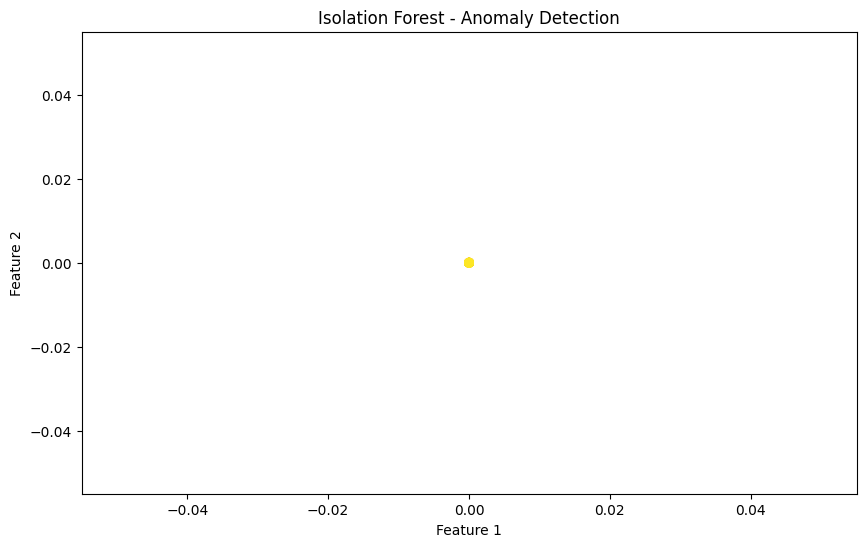

In [79]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predictions, cmap='viridis', marker='o')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The plot below uses PCA to reduce the dimensions to 2 and visualizes the results with the first two principal components.

Interpretation for first 2 PCA plot
Variance: The plot shows how much of the total variance is captured by the first two principal components.
Clusters: The clustering of points might show distinct groups or clusters in the dataset. Points that are far away from the majority cluster and have a different color might be potential anomalies.
Outliers: The points that are identified as anomalies (typically in a different color) are those that the Isolation Forest model considers to be outliers.

Principal Component 1 (PC1) and Principal Component 2 (PC2) are new features created by PCA that represent the directions in which the data varies the most.
The PCA plot helps visualize the data in 2D space, highlighting the differences and similarities between the observations.
It helps in understanding the separation between normal data points and anomalies as identified by the Isolation Forest model.

By using PCA, you can reduce the complexity of high-dimensional data while retaining most of the original variability, making it easier to visualize and interpret the results of anomaly detection.

In [80]:
# Perform PCA to reduce dimensions to 2 for visualization
n_components = 3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the first few principal components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Add predictions for color coding
pca_df['Anomaly'] = predictions

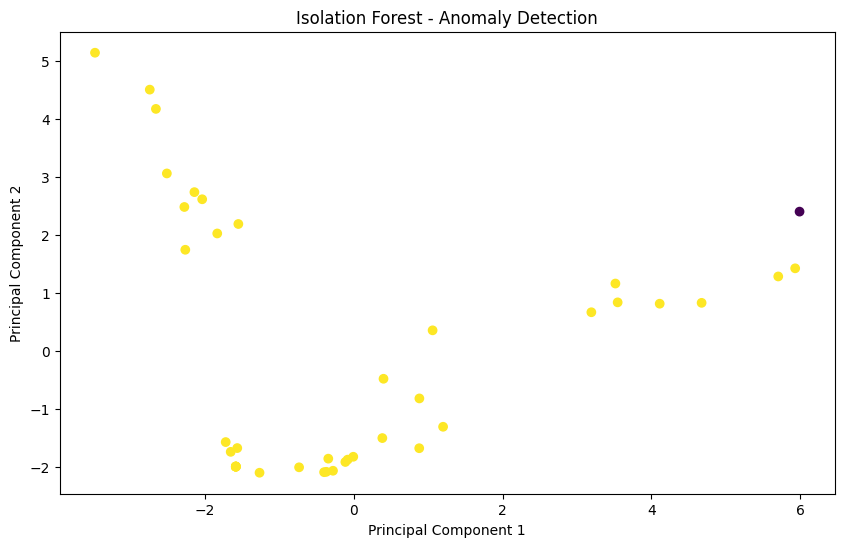

In [82]:
# Plot the results using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis', marker='o')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [83]:
# Add predictions for color coding
pca_df['Anomaly'] = predictions

Features in PCA Plot

Principal Component 1 (PC1):
This is the first principal component and it captures the largest amount of variance in the dataset.
PC1 is a linear combination of the original features, with the weights (or loadings) of this combination chosen to maximize the variance of the projected data.
It explains the most significant variation in your data.

Principal Component 2 (PC2):
This is the second principal component and it captures the second largest amount of variance in the dataset, orthogonal (uncorrelated) to the first principal component.
PC2 is also a linear combination of the original features, chosen to be orthogonal to PC1 and to maximize the variance in the remaining dimensions.
It explains the next most significant variation in your data.

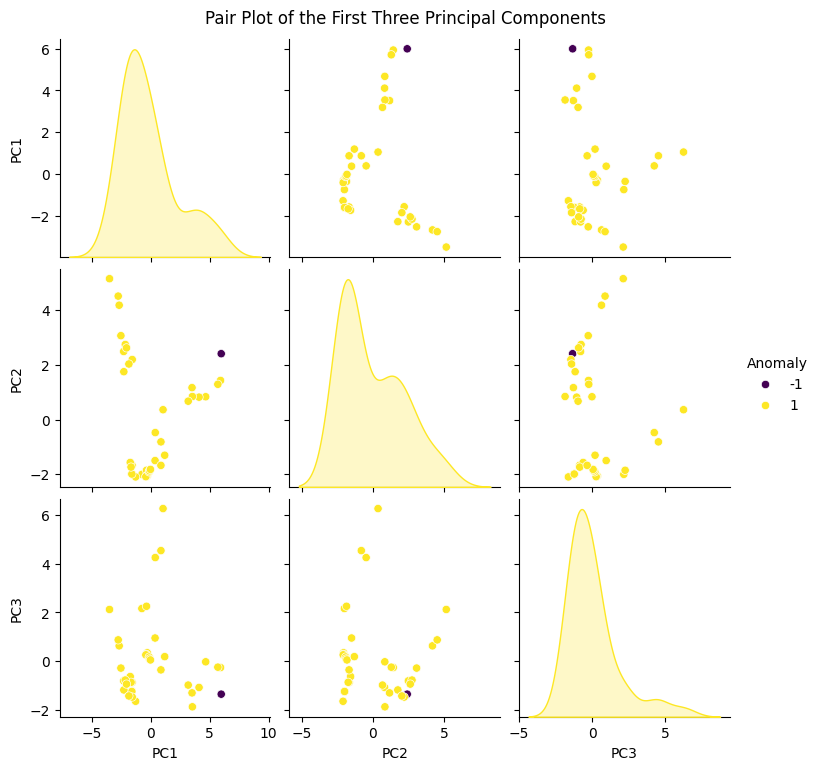

In [96]:
# Pair plot of the first few principal components
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3'], hue='Anomaly', palette='viridis')
plt.suptitle('Pair Plot of the First Three Principal Components', y=1.02)
plt.show()

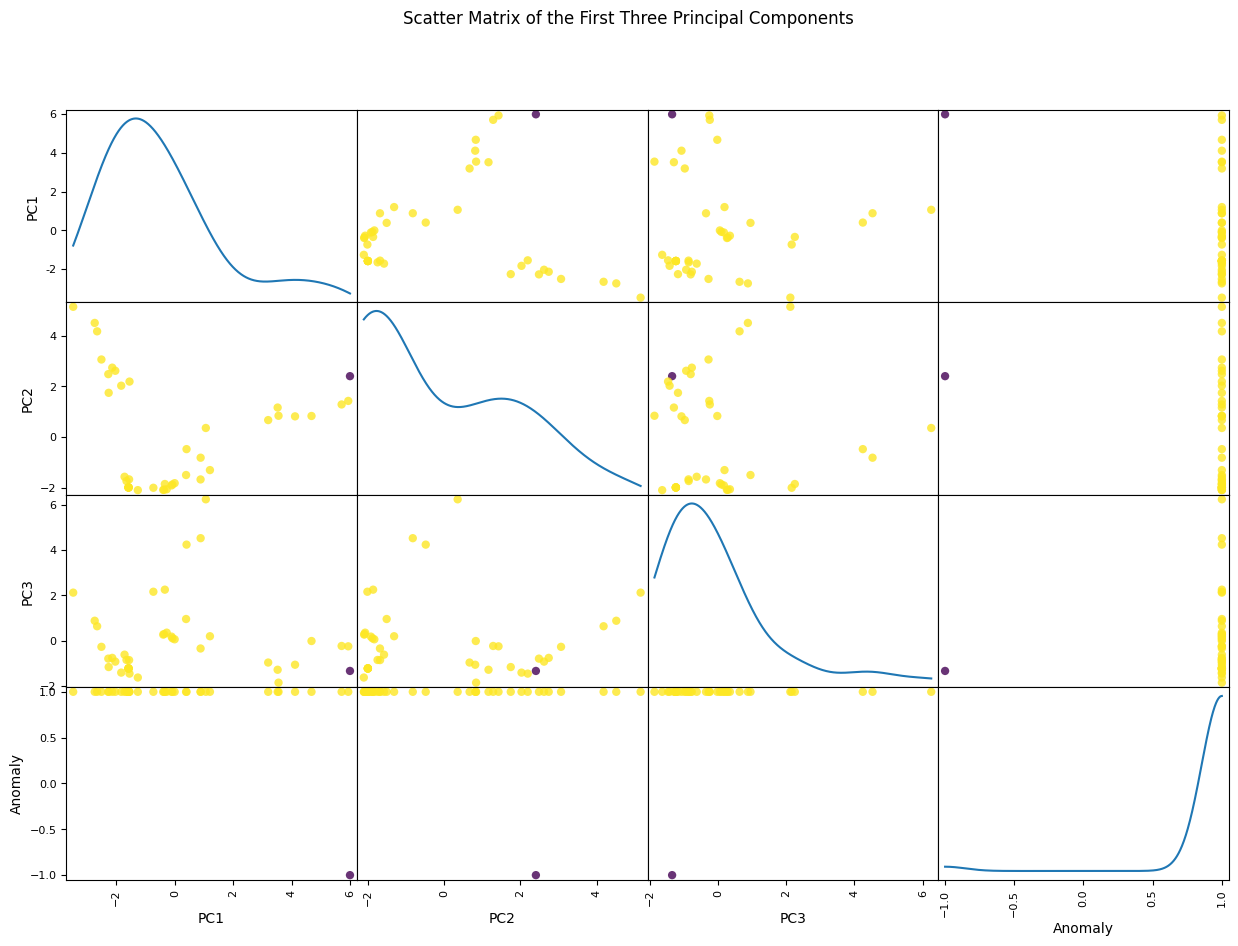

In [43]:
# Scatter matrix plot
from pandas.plotting import scatter_matrix

scatter_matrix(pca_df[['PC1', 'PC2', 'PC3', 'Anomaly']], figsize=(15, 10), alpha=0.8, diagonal='kde', marker='o', c=pca_df['Anomaly'], cmap='viridis')
plt.suptitle('Scatter Matrix of the First Three Principal Components')
plt.show()


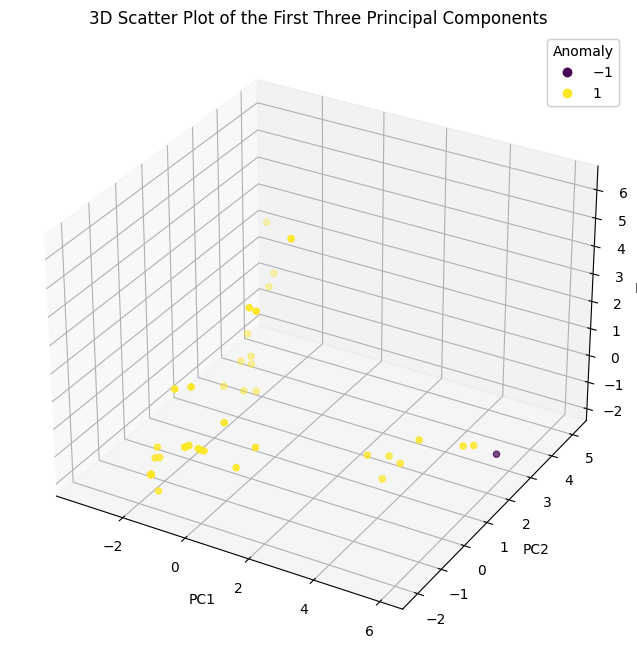

In [44]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Anomaly'], cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Anomaly")
ax.add_artist(legend1)
ax.set_title('3D Scatter Plot of the First Three Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


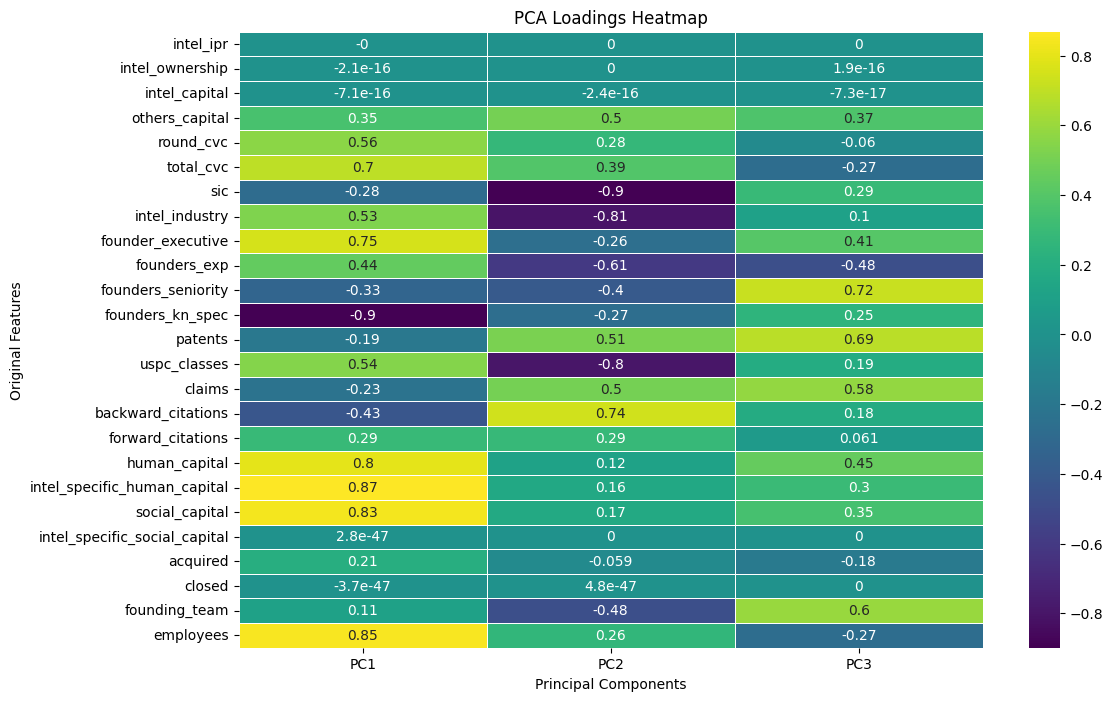

In [88]:
# Visualize the loadings of the first two principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=selected_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='viridis', linewidths=.5)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


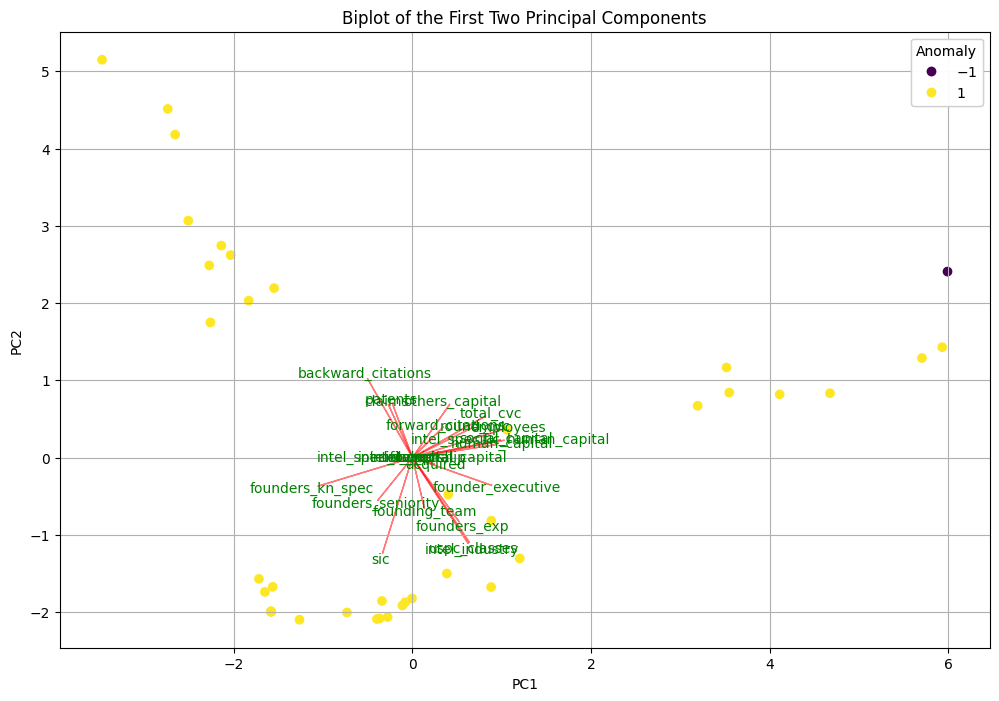

In [46]:
# Biplot for the first two principal components
def biplot(scores, loadings, labels=None, features=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = loadings.shape[0]

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot scores
    scatter = ax.scatter(xs, ys, c=pca_df['Anomaly'], cmap='viridis', marker='o')
    legend1 = ax.legend(*scatter.legend_elements(), title="Anomaly")
    ax.add_artist(legend1)
    
    for i in range(n):
        plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3, color='r', alpha=0.5)
        if features is None:
            plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, features[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title('Biplot of the First Two Principal Components')
    plt.show()

biplot(X_pca, pca.components_.T, features=selected_columns)


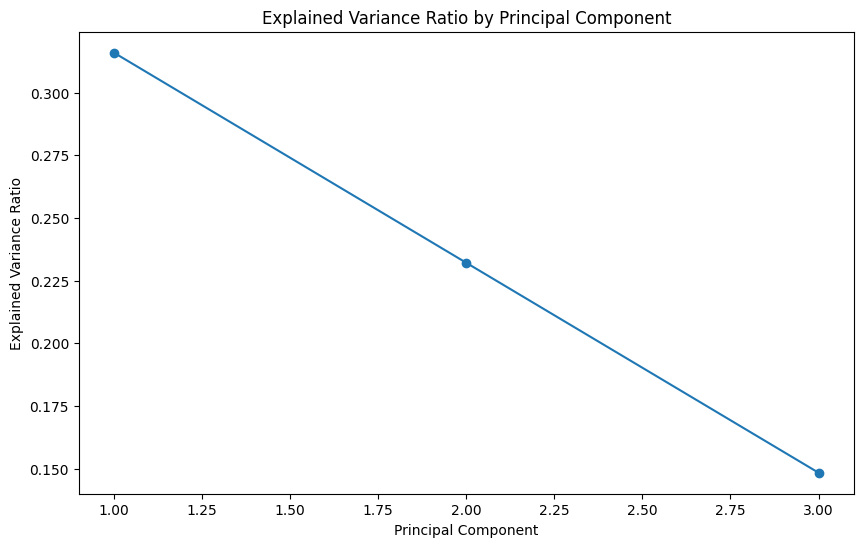

In [49]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_components + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


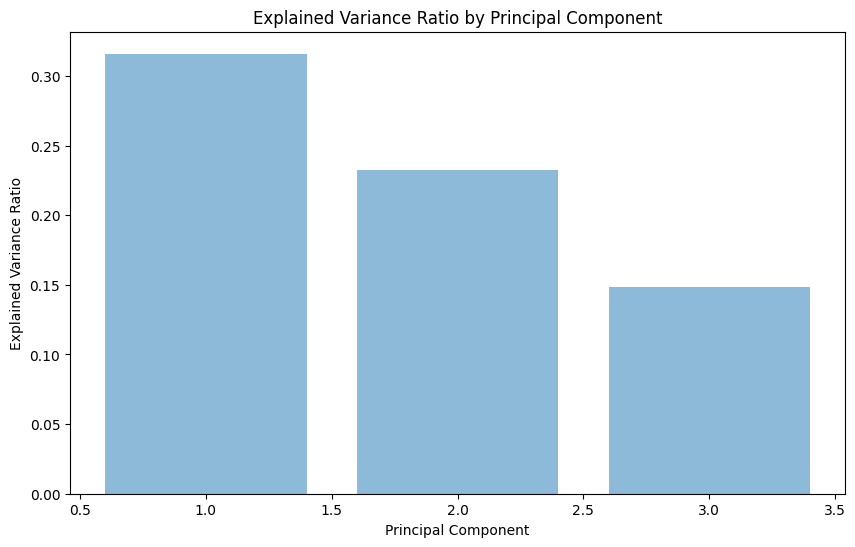

In [50]:
# Plot the explained variance ratio as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()